In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import shap

## 1. Load & Preview Data

In [22]:
# Load the CSV
df = pd.read_csv("../data/Telco_Customer_Churn_feature_engineered_v1.csv")

# Quick preview
df.head()

,customerID,IsSeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,HasPartnerOrDependents,ExpectedTotalCharges,BillingDiffPct,Churn_num,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_Early,TenureGroup_Loyal,PackageChangeBehavior_Downgrade,PackageChangeBehavior_Upgrade,value_segment_Mid,value_segment_High,value_segment_VIP
0,7590-VHVEG,0,1,29.85,29.85,No,1,29.85,0.000000,0,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,0,34,56.95,1889.50,No,0,1936.30,-0.024170,0,...,False,False,True,False,True,True,False,True,False,False
2,3668-QPYBK,0,2,53.85,108.15,Yes,0,107.70,0.004178,1,...,False,False,True,False,False,False,False,True,False,False
3,7795-CFOCW,0,45,42.30,1840.75,No,0,1903.50,-0.032965,0,...,False,False,False,False,True,True,False,True,False,False
4,9237-HQITU,0,2,70.70,151.65,Yes,0,141.40,0.072484,1,...,False,True,False,False,False,False,True,False,True,False


In [23]:
X = df.drop(columns=['customerID', 'Churn','Churn_num'])
y = df['Churn_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [24]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

## Training the best model

In [25]:
best_xgb_model_sm = XGBClassifier(colsample_bytree= 0.7, gamma= 0, learning_rate= 0.01, max_depth= 7, min_child_weight= 1, n_estimators= 100, subsample= 1, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb_model_sm.fit(X_train,y_train)

c:\Users\tajbo\anaconda3\envs\datascience_base\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:13:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

## SHAP values

In [34]:
X_train.columns

Index(['IsSeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'HasPartnerOrDependents', 'ExpectedTotalCharges', 'BillingDiffPct',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'TenureGroup_Early', 'TenureGroup_Loyal',
       'PackageChangeBeha

In [26]:
bool_cols = X_train.select_dtypes(include="bool").columns
X_train[bool_cols] = X_train[bool_cols].astype("int64")
X_test[bool_cols] = X_test[bool_cols].astype("int64")

In [29]:
explainer = shap.Explainer(best_xgb_model_sm, X_train)
shap_values = explainer(X_test)

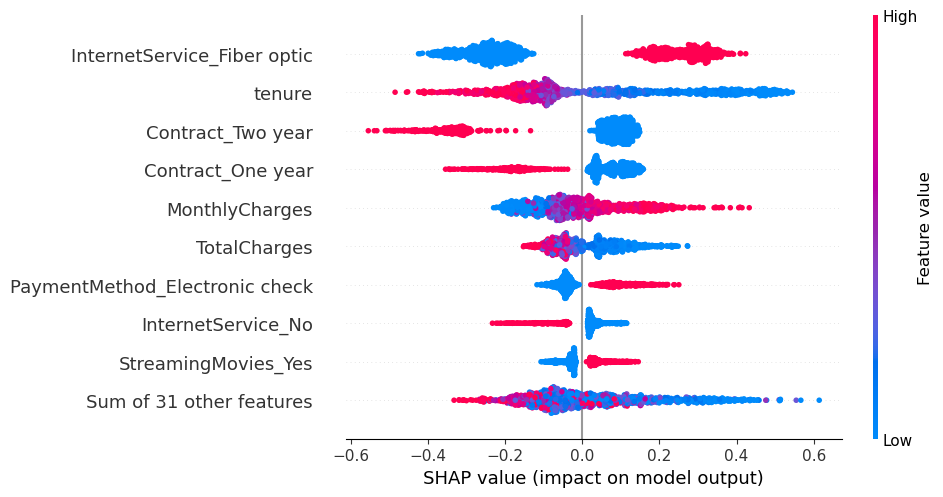

In [ ]:
shap.plots.beeswarm(shap_values)

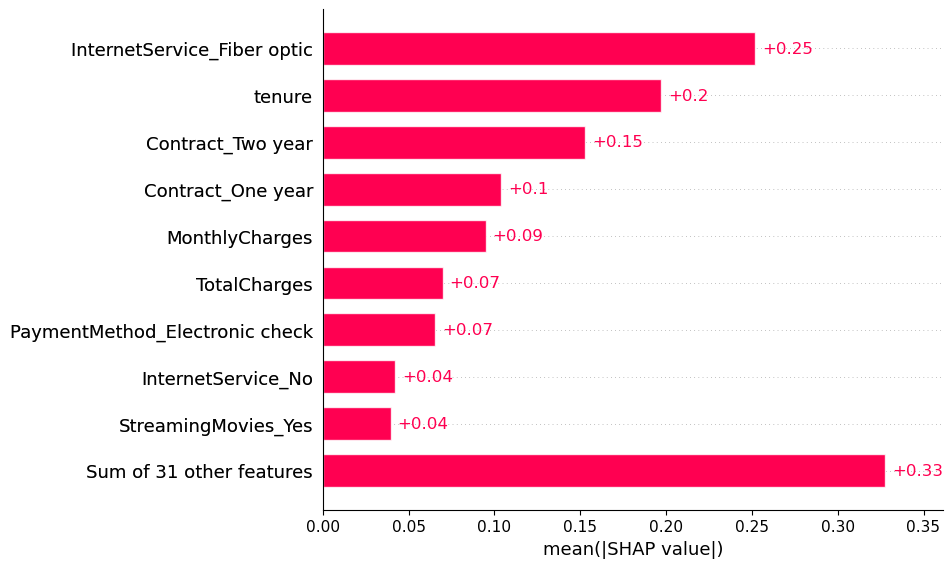

In [ ]:
shap.plots.bar(shap_values)

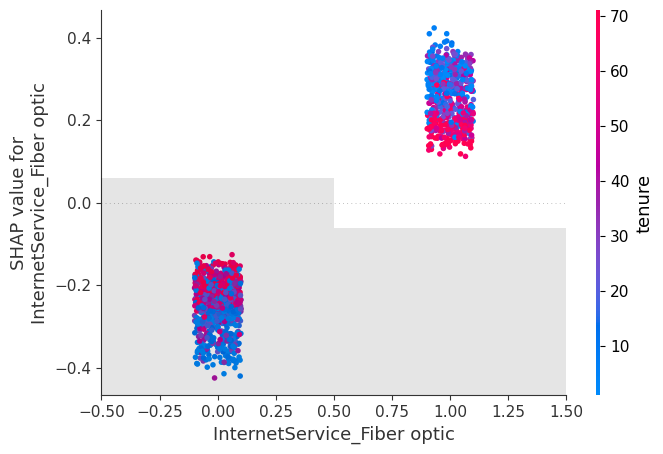

In [35]:
shap.plots.scatter(shap_values[:, 'InternetService_Fiber optic'], color=shap_values)

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0], matplotlib=True, show=False)

# Save the plot
plt.savefig("../outputs/visuals/SHAP/shap_force_plot.png", dpi=300, bbox_inches="tight")
plt.close()